In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Ejercicio 1

In [2]:
class GCL:
    """Generador Lineal Congruente

    atributos:
     m: el modulo
     a: el multiplicador
     c: el incremento
     xn: ultimo valor generado
    """

    def __init__(self, m, a, c, x0):
        self.m = m
        self.a = a
        self.c = c
        self.xn = x0

    def generar_numero_aleatorio(self):
        self.xn = (self.a * self.xn + self.c) % self.m
        return self.xn

In [3]:
m = 2**32
a = 1013904223
c = 1664525

padrones = [93272, 92028, 79979, 96749]
x0 = int(sum(padrones)/len(padrones))

## 1.a

In [4]:
def generar_secuencia(secuencia_largo):
    gcl = GCL(m, a, c, x0)
    secuencia = []
    for i in range(secuencia_largo):
        secuencia.append(gcl.generar_numero_aleatorio())

    return secuencia

tam_muestra = 10
primeros_diez = generar_secuencia(tam_muestra)
print(primeros_diez)

[3454896546, 8404779, 606119938, 277718219, 4216340066, 875795051, 1362250946, 1409026059, 1862062882, 3706783147]


## 1.b

In [5]:
class GCL_01(GCL):
    """Generador Lineal Congruente con distribucion [0, 1]
    """

    def generar_numero_aleatorio(self):
        return super().generar_numero_aleatorio()/m

## 1.c

In [6]:
def generar_secuencia(secuencia_largo):
    gcl = GCL_01(m, a, c, x0)
    secuencia = []
    for i in range(secuencia_largo):
        secuencia.append(gcl.generar_numero_aleatorio())

    return secuencia

tam_muestra = 100000
muestra = generar_secuencia(tam_muestra)

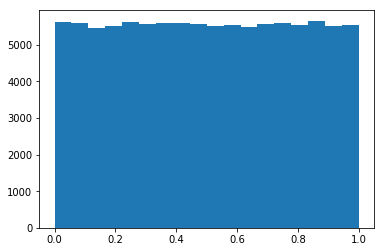

In [7]:
plt.hist(muestra, 'sturges')
plt.show()

# Ejercicio 2

## 2.a

In [8]:
from math import exp

In [9]:
def f(t):
    lambda_ = 1/15
    if t >= 0 and t < 10:
        return 1/25
    elif t >= 10:
        return 3/5 * lambda_ * exp(-1 * lambda_ * (t - 10))

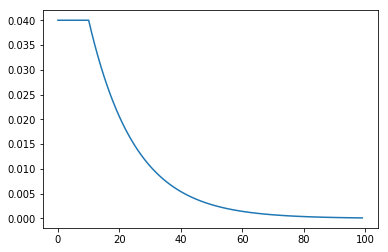

In [10]:
x = np.arange(0.0, 100.0, 1)
y = np.array(list(map(f, x)))

plt.plot(x, y)
plt.show()

## 2.b

In [11]:
def F(t):
    lambda_ = 1/15
    if t >= 0 and t < 10:
        return 10/25
    elif t >= 10:
        return 3/5 * (1 - exp(-1 * lambda_ * (t - 10)) )

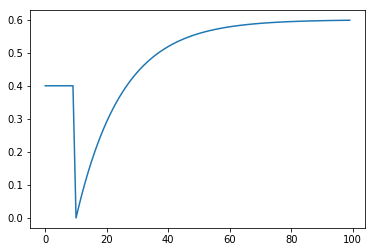

In [12]:
x = np.arange(0.0, 100.0, 1)
y = np.array(list(map(F, x)))

plt.plot(x, y)
plt.show()

## 2.c y 2.d

In [13]:
tam_muestra = 100000
# muestra de numeros aleatorios con distrib uniforme [0, 1]
muestra = generar_secuencia(tam_muestra)

In [14]:
from math import log

In [15]:
def f_inversa(t):
    lambda_ = 1/15
    if t >= 0 and t < 10:
        return 10/25
    elif t >= 10:
        return (-1/lambda_) * log(1 - 5/3 * t) + 10

In [16]:
x = np.arange(0.0, 100.0, 1)
y = np.array(list(map(f_inversa, x)))

plt.plot(x, y)
plt.show()

ValueError: math domain error

In [ ]:
lambda_ = 1/15

(-1/lambda_) * log(1-5/3) + 10

# Ejercicio 3

## 3.a

In [17]:
media, desvio_standar = 15, 3
tamanio_muestra = 100000

muestra = np.random.normal(media, desvio_standar, tamanio_muestra)

## 3.b

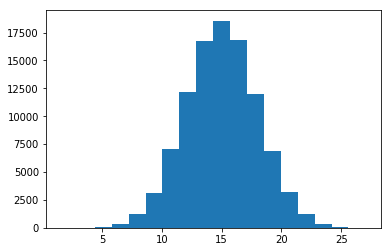

In [19]:
plt.hist(muestra, 'sturges')
plt.show()

## 3.c

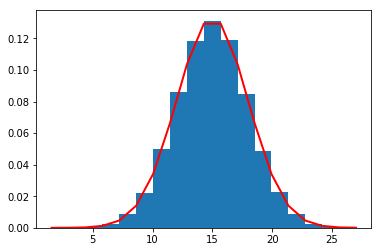

In [21]:
count, bins, ignored = plt.hist(muestra, 'sturges', density=True)

plt.plot(bins,
         1/(desvio_standar * np.sqrt(2 * np.pi)) * np.exp( - (bins - media)**2 / (2 * desvio_standar**2) ), linewidth=2, color='r')

plt.show()

## 3.d

In [23]:
# media de la muestra
muestra_media = np.mean(muestra)
muestra_media

14.996689238613097

In [24]:
# desvio estandar de la muestra
muestra_desvio_standar = np.std(muestra)
muestra_desvio_standar

2.9926775881382164

In [25]:
# los comparo con los valores teoricos
media - muestra_media

0.003310761386902783

In [26]:
desvio_standar - muestra_desvio_standar

0.007322411861783618